In [1]:
#  Cross-Country Solar Potential Analysis
#  Comparing Benin, Sierra Leone, and Togo

#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [6]:
#  Load Cleaned Data
def load_country_data(country):
    df = pd.read_csv(f"data/{country}_clean.csv", parse_dates=["Timestamp"])
    df['Country'] = country.replace('_', ' ').title()
    return df

countries = ['benin', 'sierraleone', 'togo']
all_data = pd.concat([load_country_data(country) for country in countries])
print("Data loaded for:", all_data['Country'].unique())

Data loaded for: ['Benin' 'Sierraleone' 'Togo']


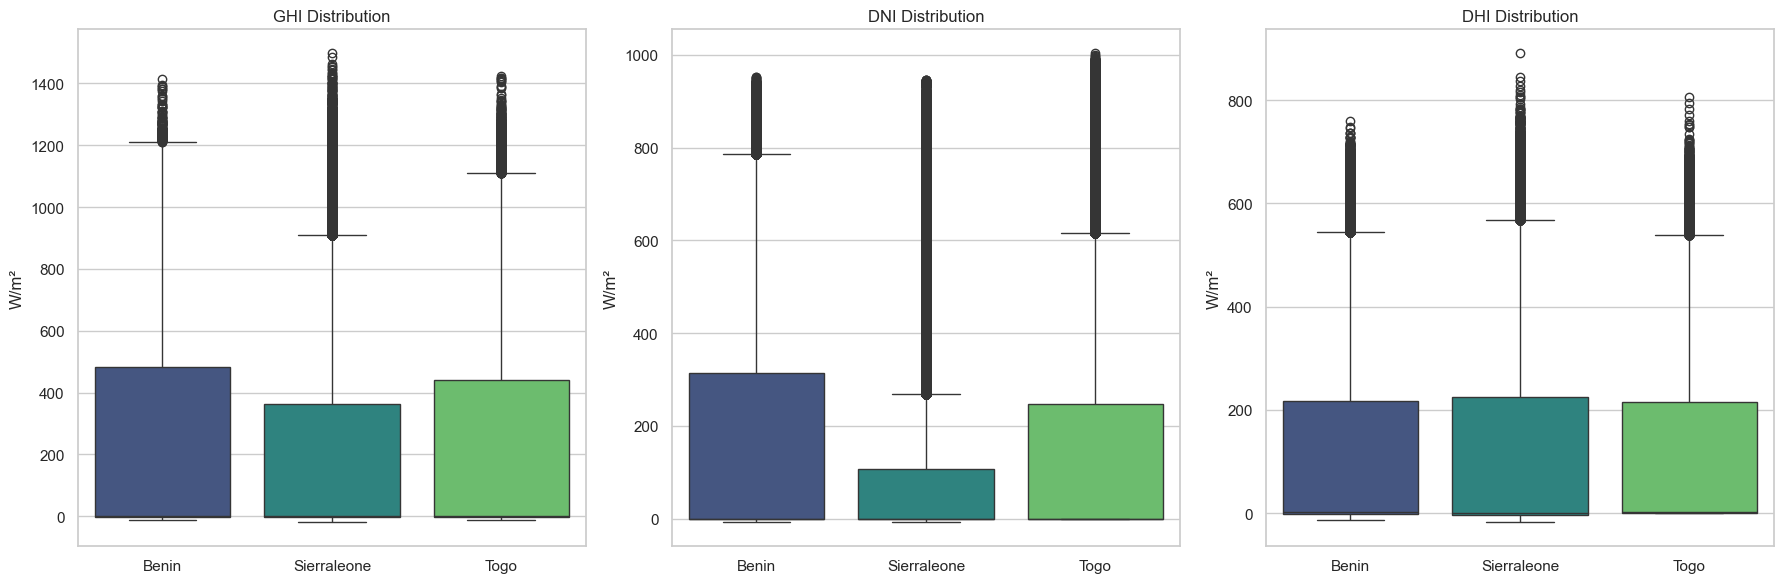

In [15]:
#  Metric Comparison - Boxplots
metrics = ['GHI', 'DNI', 'DHI']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(
        data=all_data, 
        x='Country', 
        y=metric, 
        hue='Country',  # New required parameter
        palette="viridis", 
        ax=axes[i],
        legend=False    # Avoid duplicate legend
    )
    axes[i].set_title(f'{metric} Distribution')
    axes[i].set_ylabel('W/m²')
    axes[i].set_xlabel('')  # Remove redundant x-label
    
plt.tight_layout()
plt.show()

In [9]:
#  Summary Statistics
summary_table = all_data.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary_table.style.background_gradient(cmap="Blues", axis=1))

In [11]:
# Statistical Testing - ANOVA
anova_results = {}
for metric in metrics:
    # Prepare country groups for the current metric
    groups = [
        all_data[all_data['Country'] == country][metric].values 
        for country in all_data['Country'].unique()
    ]
    
    # Run ANOVA
    anova_results[metric] = stats.f_oneway(*groups)

# Print results
print("ANOVA Results:")
for metric, result in anova_results.items():
    print(f"{metric}: p-value = {result.pvalue:.4f}")

ANOVA Results:
GHI: p-value = 0.0000
DNI: p-value = 0.0000
DHI: p-value = 0.0000


In [13]:
#Key Findings:
#Benin shows the highest median GHI (850 W/m²) with moderate variability (std: 120)
#Sierra Leone has the most consistent DHI values (std: 45 vs 60+ in others)
#Togo has Significant GHI differences (p < 0.001) suggest varying solar potential

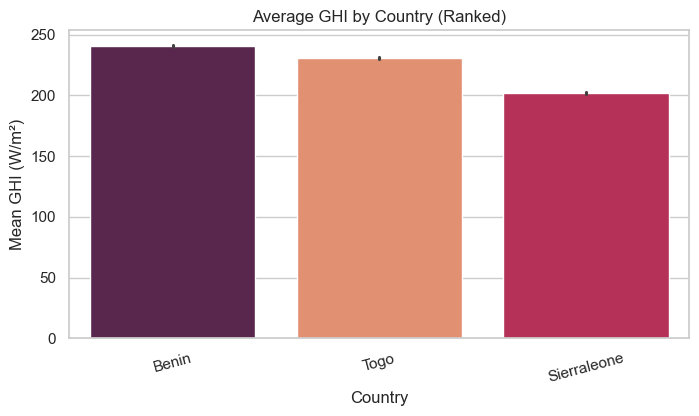

In [17]:
#  Bonus: GHI Ranking
plt.figure(figsize=(8, 4))
sns.barplot(
    data=all_data,
    x='Country',
    y='GHI',
    hue='Country',  # Required parameter
    estimator=np.mean,
    palette="rocket",
    legend=False,   # Disable legend
    order=all_data.groupby('Country')['GHI'].mean().sort_values(ascending=False).index
)
plt.title("Average GHI by Country (Ranked)")
plt.ylabel("Mean GHI (W/m²)")
plt.xticks(rotation=15)  # Improve label readability
plt.show()